<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_bill    244 non-null    float64
 1   tip           244 non-null    float64
 2   sex           244 non-null    object 
 3   smoker        244 non-null    object 
 4   day           244 non-null    object 
 5   time          244 non-null    object 
 6   size          244 non-null    int64  
 7   row_id        244 non-null    int64  
 8   wait_time     244 non-null    float64
 9   seating_area  244 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 19.2+ KB


,total_bill,tip,sex,smoker,day,time,size,row_id,wait_time,seating_area
0,16.99,2.55,Female,No,Sun,Lunch,2,0,0.000000,patio
1,10.34,3.18,Male,No,Sun,Lunch,3,1,12.000000,dining_room
2,21.01,5.05,Male,No,Sun,Lunch,3,2,0.000000,dining_room
3,23.68,4.82,Male,No,Sun,Dinner,2,3,6.000000,bar
4,24.59,5.13,Female,No,Sun,Dinner,4,4,23.342975,dining_room


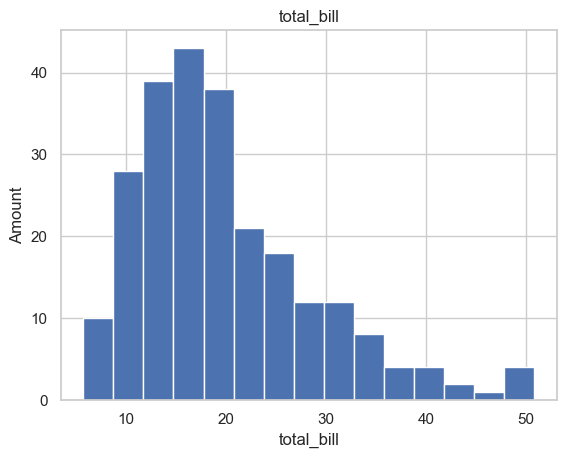

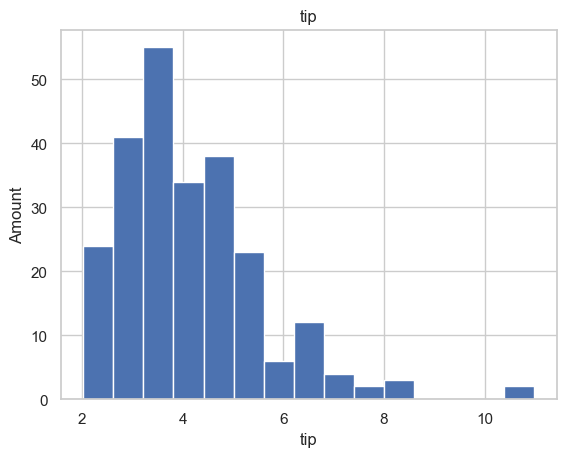

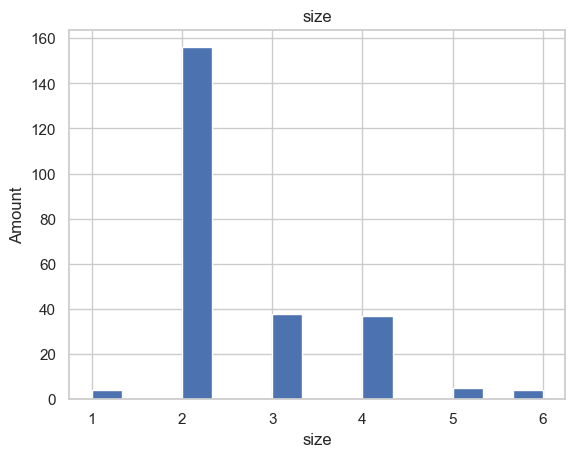

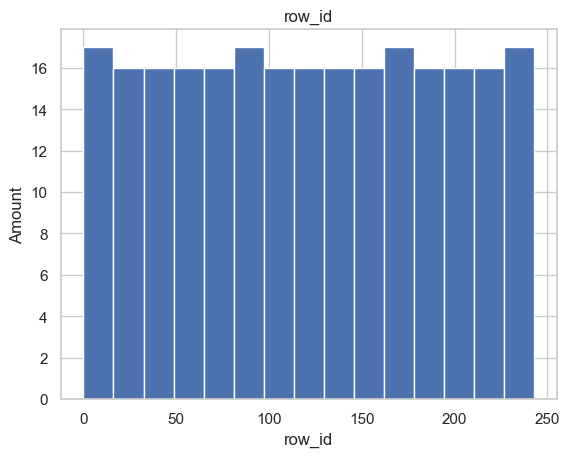

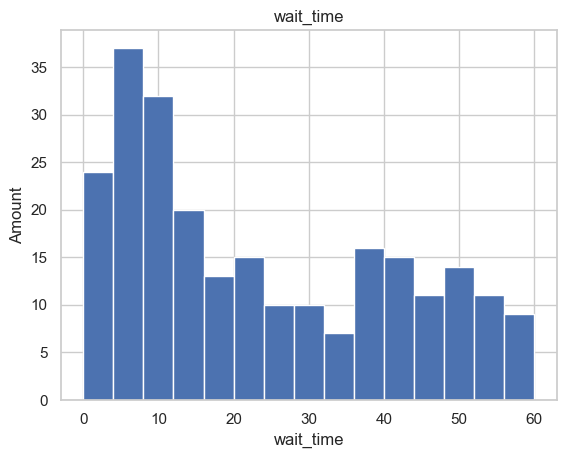

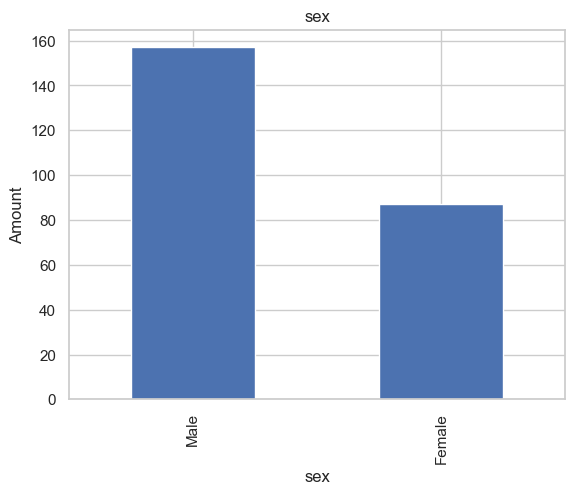

Value counts for sex
sex
Male      157
Female     87
Name: count, dtype: int64




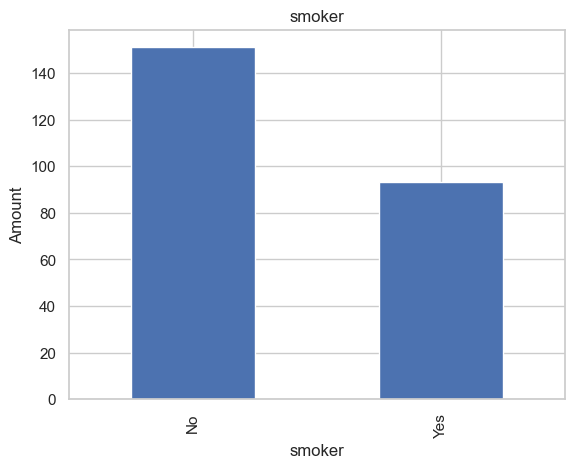

Value counts for smoker
smoker
No     151
Yes     93
Name: count, dtype: int64




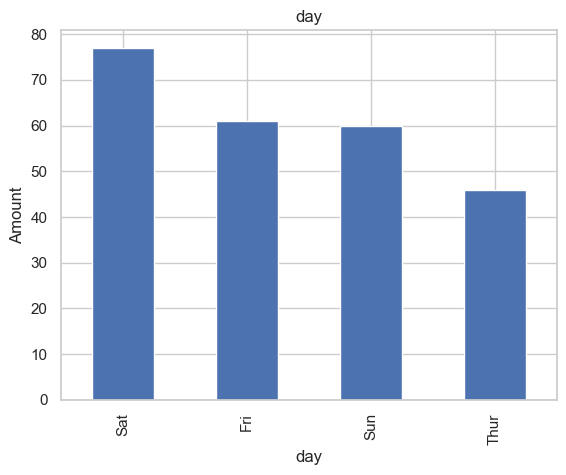

Value counts for day
day
Sat     77
Fri     61
Sun     60
Thur    46
Name: count, dtype: int64




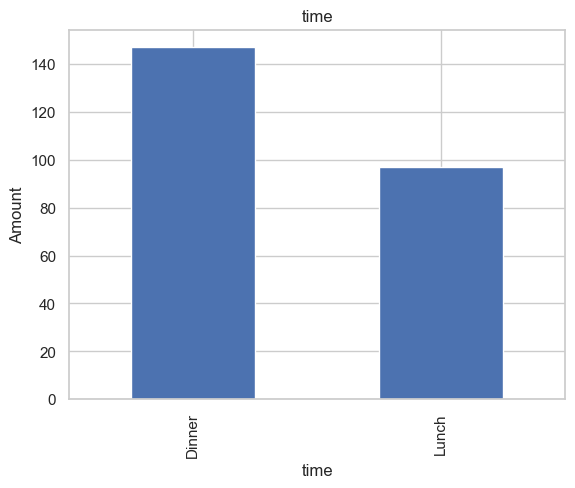

Value counts for time
time
Dinner    147
Lunch      97
Name: count, dtype: int64




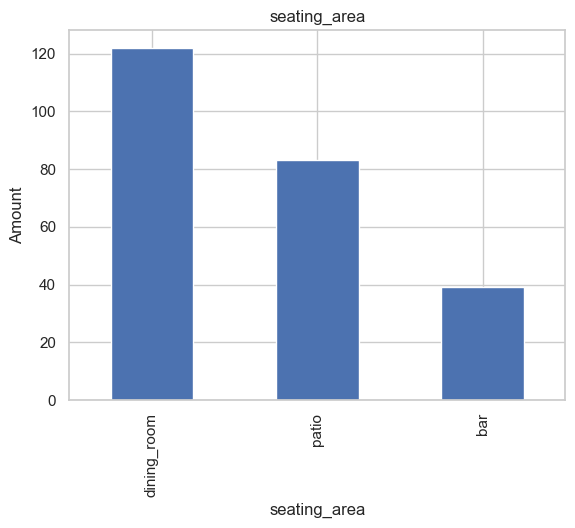

Value counts for seating_area
seating_area
dining_room    122
patio           83
bar             39
Name: count, dtype: int64




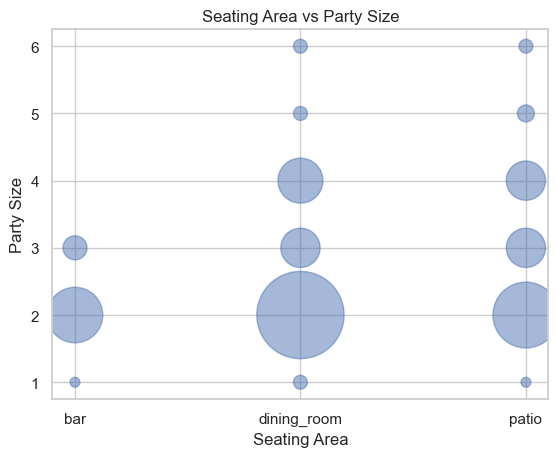

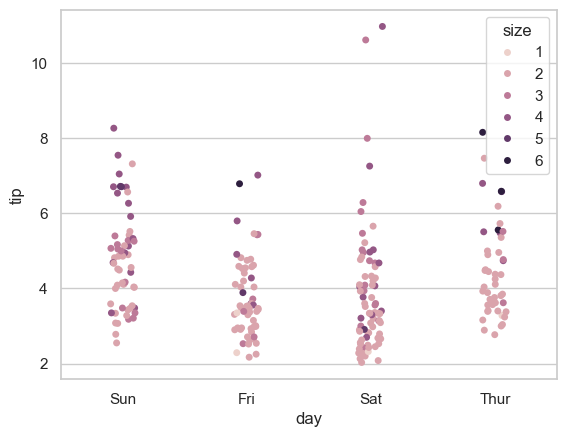

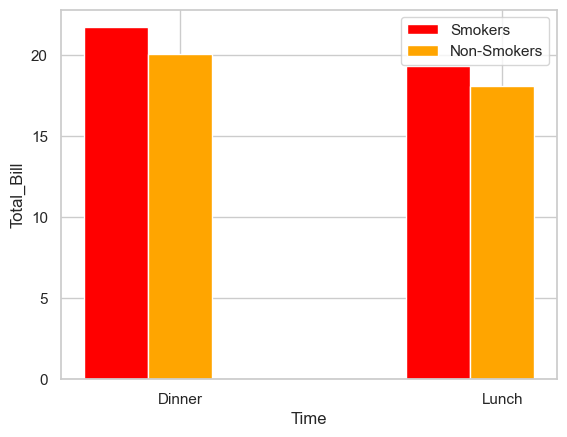

C:\Users\James\AppData\Local\Temp\ipykernel_26656\3682063626.py:83: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby(["sex", "wait_time_binned"]).agg(Count=('tip','size'), Tip=('tip','mean')).reset_index();
C:\Users\James\AppData\Local\Temp\ipykernel_26656\3682063626.py:85: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = count_data.pivot_table(index='wait_time_binned', columns='sex', values='Tip', aggfunc="mean")


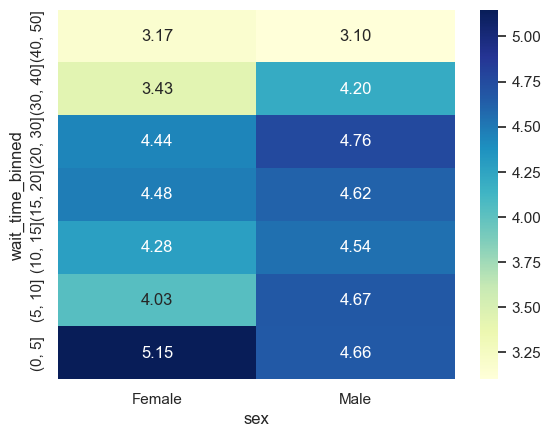

,count,mean,std,min,Q1,Q2 (median),Q3,max,IQR,skew,kurtosis
total_bill,244,19.859713,8.837668,5.75,13.385,17.815,24.1275,50.81,10.7425,1.161142,1.250748
tip,244,4.159139,1.430917,2.03,3.175,3.890,4.9000,10.98,1.7250,1.386451,3.177262
size,244,2.569672,0.951100,1.00,2.000,2.000,3.0000,6.00,1.0000,1.447882,1.731700
row_id,244,121.500000,70.580923,0.00,60.750,121.500,182.2500,243.00,121.5000,0.000000,-1.200000
wait_time,244,23.342975,17.833539,0.00,7.750,19.000,39.0000,60.00,31.2500,0.508374,-1.096536


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

df = pd.read_csv("tips_A3.csv", encoding='ISO-8859-1')

print(type(df))

df.info()

display(df.head())


num_cols = df.select_dtypes(include=["number"]).columns.tolist()

for col in num_cols:
    plt.figure()
    df[col].hist(bins=int(math.sqrt(len(df[col]))));
    plt.title(f"{col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Amount")
    plt.show()

cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

pd.set_option('display.max_rows', None)

for col in cat_cols:
    plt.figure()
    counts = df[col].value_counts().head(10);
    counts.plot(kind='bar')
    plt.title(f"{col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Amount")
    plt.show()
    print(f"Value counts for {col}")
    print(df[col].value_counts())
    print("\n")
    

#Question 1
count_data = df.groupby(["seating_area", "size"]).size().reset_index(name="Count")

plt.figure()
plt.scatter(count_data['seating_area'], count_data['size'], s=count_data['Count']*50, alpha=0.5)

plt.title("Seating Area vs Party Size")
plt.xlabel("Seating Area")
plt.ylabel("Party Size")
plt.grid(True)
plt.show()

#Question 2

sns.stripplot(x="day", y="tip",hue="size", data=df)
plt.show()

#Question 3
count_data = df.groupby(["smoker", "time"]).agg(Total_Bill=('total_bill','mean')).reset_index();

pivot = count_data.pivot(index="smoker", columns="time", values="Total_Bill")
x_labels=pivot.columns
x = np.arange(len(x_labels)) 
y1=pivot.loc['Yes'].values
y2=pivot.loc['No'].values
width = 0.2

plt.figure()
plt.bar(x-0.2, y1, width, color='red')
plt.bar(x, y2, width, color='orange')
plt.xticks(x, x_labels)
plt.xlabel("Time")
plt.ylabel("Total_Bill")
plt.legend(["Smokers", "Non-Smokers"])
plt.show()

#Question 4
bins = [0, 5, 10, 15, 20, 30, 40, 50]
df['wait_time_binned'] = pd.cut(df['wait_time'], bins=bins)

count_data = df.groupby(["sex", "wait_time_binned"]).agg(Count=('tip','size'), Tip=('tip','mean')).reset_index();

heatmap_data = count_data.pivot_table(index='wait_time_binned', columns='sex', values='Tip', aggfunc="mean")
heatmap_data = heatmap_data.sort_index(ascending=False)
sns.heatmap(heatmap_data, annot=True, fmt='.2f',cmap="YlGnBu")
plt.show()


summary = pd.DataFrame({
    "count": df[num_cols].notna().sum(),
    "mean": df[num_cols].mean(numeric_only=True),
    "std": df[num_cols].std(numeric_only=True),
    "min": df[num_cols].min(numeric_only=True),
    "Q1": df[num_cols].quantile(0.25, numeric_only=True),
    "Q2 (median)": df[num_cols].median(numeric_only=True),
    "Q3": df[num_cols].quantile(0.75, numeric_only=True),
    "max": df[num_cols].max(numeric_only=True),
    "IQR": df[num_cols].quantile(0.75, numeric_only=True) - df[num_cols].quantile(0.25, numeric_only=True),
    "skew": df[num_cols].skew(numeric_only=True),
    "kurtosis": df[num_cols].kurtosis(numeric_only=True),
})

summary